### Stats131
- Chenhui Hu
- Yongtong Tan
- Longyin Poon

# Happiness Data context and description of the data

### Background information on the subject and field of study：
- The data, World Happiness Report, explores the happiness scores and rankings by country. The scores are based on answers to the main life evaluation question asked in the poll. In this data, we have total of 158 rows represent 158 countries. The columns following the happiness score estimate the extent to which each of six factors- economic production, social support(Family), life expectancy(Health), freedom, absence of corruption(Trust), and generosity- contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. These columns also describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer. If you add all these factors up, you get the happiness score. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Information about data collection :

- The data was collected by the Gallup World Poll, who track and analyze crucial world issues affecting lives of people. And it was released at United Nations. The world happiness dataset we used was collected in 2015 and 2016 individually. Data were collected from people in over 150 countries. The typical survey includes at least 1,000 individuals. In some countries, Gallup collects oversamples in major cities or areas of special interest. For large countries, such as China and Russia, larger sample sizes would be assigned to these counties. 

- Respondents were required to think and answer their feelings toward happiness running from 0 to 10. The scores are based on answer to the main life evaluation questions asked in the poll. Each variable measured reveals a spopulated-weighted average score and is tracked over time and compared against other countries. 

- Gallup uses telephone surveys in countries where telephone coverage represents at least 80% of the population or is the customary survey methodology. In countries where telephone interviewing is employed, Gallup uses a random-digit-dial method or a nationally representative list of phone numbers. In the developing world, Gallup uses an area frame design for face-to-face interviewing in randomly selected households. While telephone interviews are about 30 minutes, face-to-face interviews are approximately one hour.  

- First, Gallup selects the Primary Sampling Units (PSUs). Sample selection is based on probabilities proportional to population size; otherwise, Gallup uses simple random sampling. Gallup makes at least three attempts to reach a person in each household. Then, Gallup uses random-route procedures to select sampled households. If the interviewer cannot obtain an interview at the initial sampled household, he or she uses a simple substitution method. Finally, they select respondents. In face-to-face and telephone methodologies, random respondent selection is achieved by using either the latest birthday or Kish grid method.

- However, some staticians argue that these surveys depend on subjective self-reporting, not to mention eliding cultural differences. 


# Happiness Data Exploratory Analysis
#### Load standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score

# Data Overview
#### Load data

In [2]:
df = pd.read_csv("2015.csv")

##### Set country name as index

In [3]:
df.set_index("Country", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


#### What countries have the highest happiness score and which region they belongs to?

In [4]:
df.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Switzerland has the highest happiness score following by Iceland, Denmark, Norway and Canada. The top four countries all came from Western Europe and Canada belongs to North America.

In [5]:
print(df.shape)

(158, 11)


#### The data has 158 rows and 11 columns. Each row represents a country and each column contains information about the countries. The key variables that influence Happiness Score are:
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity.

In [6]:
key_variables = ["Happiness Score", "Economy (GDP per Capita)","Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity",]
df[key_variables].head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# Exploratory Analysis

In [7]:
df[key_variables].describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


### Pairwise Scatterplot

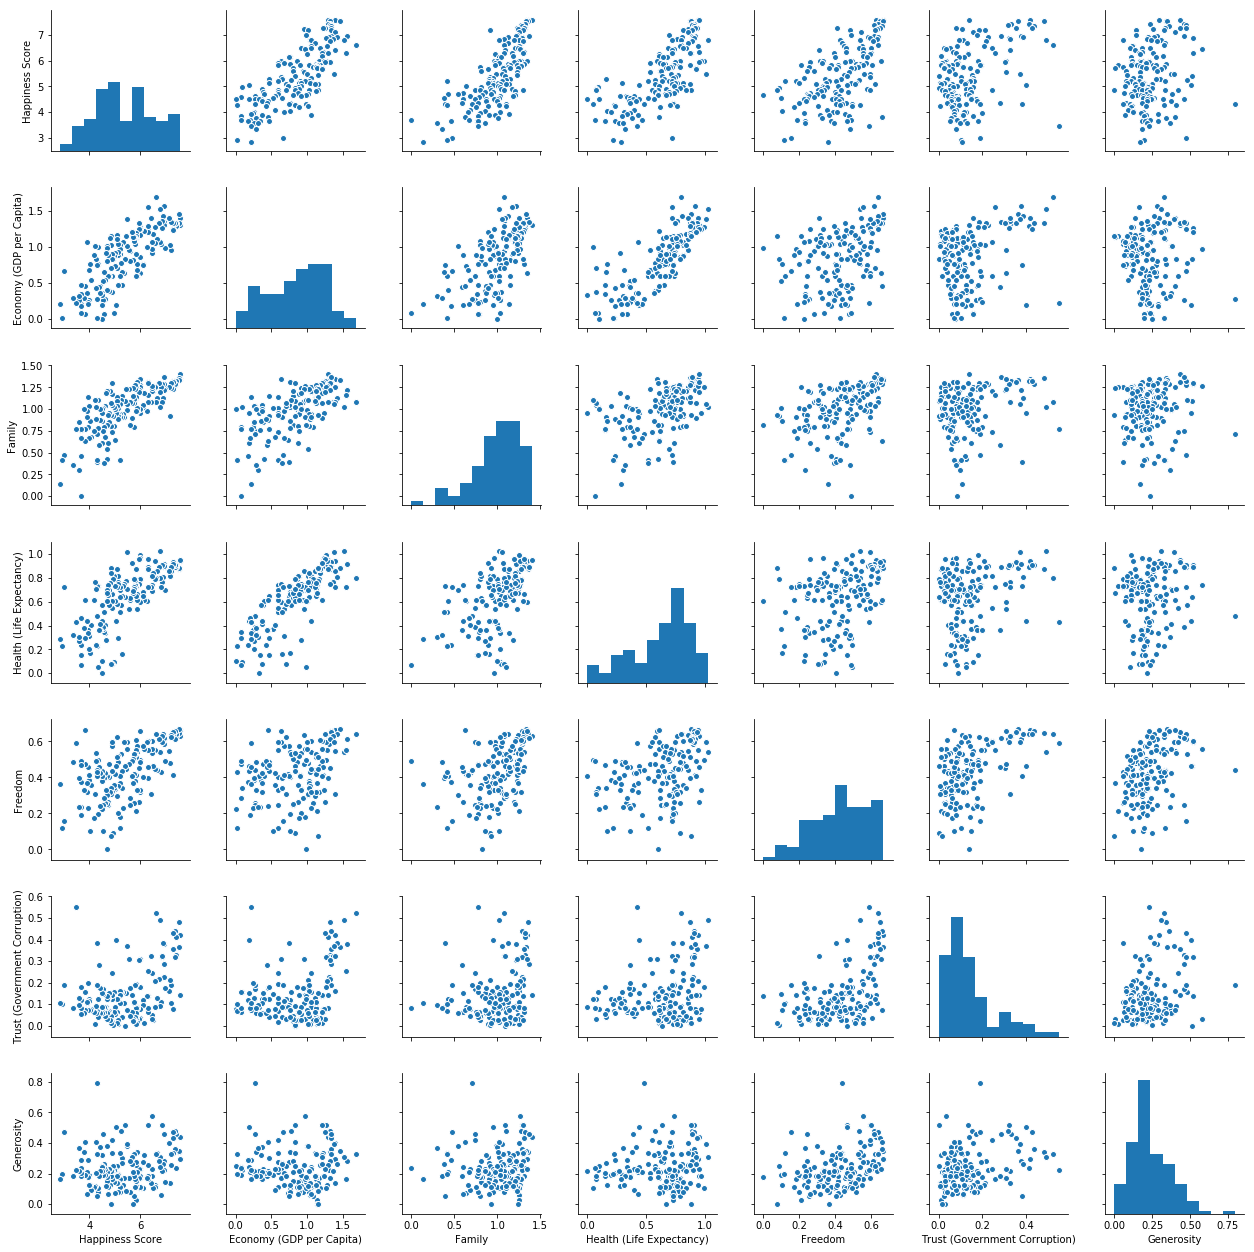

In [8]:
sns.pairplot(df[key_variables], size = 2.5)
plt.show()

From the pairwise scatterplot, we observed that Happiness Score and Economic (GDP Per Capita) has the strongest positive linear relationship. The distributions of Family, Health (Life Expectancy) and Freedom also have a relatively strong positive correlation with Happiness Score. Notice that the distributions of Economic (GDP Per Capita), Family, Health (Life Expectancy) and Freedom are left skewed while Trust (Government Corruption) and Generousity are right skewed.

### Correlation Plot

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.780966   
Economy (GDP per Capita)              0.780966                  1.000000   
Family                                0.740605                  0.645299   
Health (Life Expectancy)              0.724200                  0.816478   
Freedom                               0.568211                  0.370300   
Trust (Government Corruption)         0.395199                  0.307885   
Generosity                            0.180319                 -0.010465   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Score                0.740605                  0.724200  0.568211   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477

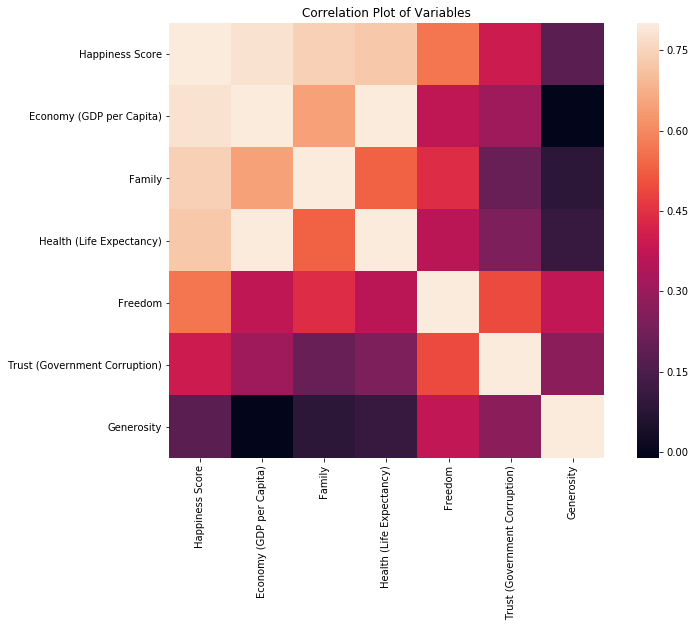

In [9]:
corrmat = df[key_variables].corr()
print(corrmat)
ax, fig = plt.subplots(figsize = (12, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("Correlation Plot of Variables")
plt.show()

Happiness Score has the highest correlation ( r = 0.781 ) with Economic (GDP per Capita). It also has strong correlation with Family and Health (Life Expectancy). Note that Economy (GDP per Capita) and Health (Life Expectancy) has high correlation with each other so we need to be aware of multicolinearity when running regression model. Freedom and Happiness Score are somewhat correlated ( r = 0.568 ), and Freedom itself has very little correlation with other variables.

### What are the distributions of the independent variables look like?

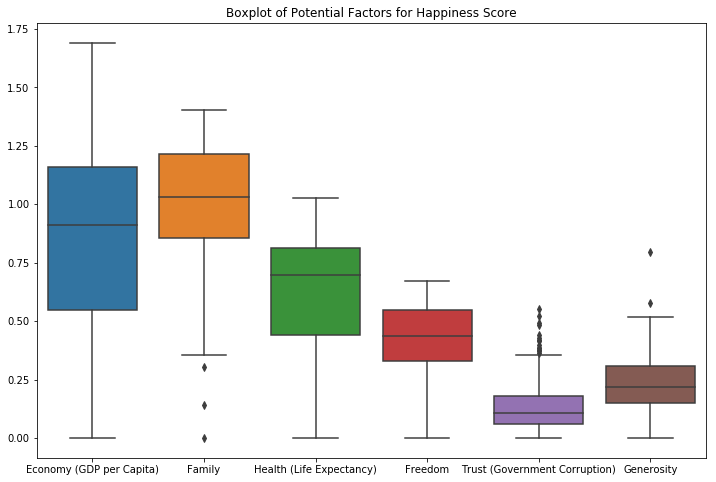

In [10]:
predictors = [
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']
ax, fig = plt.subplots(figsize = (12, 8))
sns.boxplot(data = df[predictors])
plt.title("Boxplot of Potential Factors for Happiness Score")
plt.show()

Boxplot shows that Economy has the most variation and Trust (Government Corruption) has the least variation among all countries.

### What is the distribution of Happiness Score?

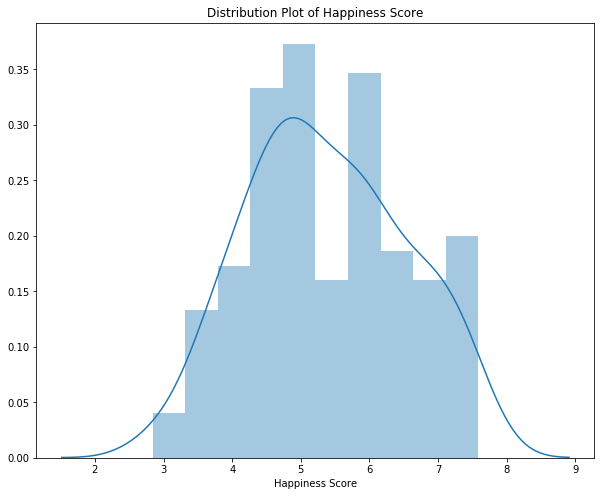

In [11]:
ax, fig = plt.subplots(figsize = (10, 8))
sns.distplot(df['Happiness Score'], bins=10)
plt.title("Distribution Plot of Happiness Score")
plt.show()

The distribution plot shows that Happiness Score is approximately normally distributed

In [12]:
print(df['Happiness Score'].describe())

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64


The summary shows that average Happiness Score is about 5.38 with a standard deviation of 1.15. The Maximum is 7.587 and the minimum is 2.839.

### What is the Happiest country in the world and where it locates?

In [13]:
df[df['Happiness Score'] == max(df['Happiness Score'])]

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


Switzerland is the happiest country in the world and it belongs to Western Europe.

### What is the Unhappiest country in the world and where it locates?

In [14]:
df[df['Happiness Score'] == min(df['Happiness Score'])]

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Togo is the happiest country in the world and it belongs to Sub-Saharan Africa.

### Regroup Region into 6 Continents for better visualization


In [15]:
df['Continents'] = df['Region']
# Group Europe Together
for i in range(158):
   if df.Continents[i] == "Western Europe":
        df.Continents[i] = "Europe"
for i in range(158):
   if df.Continents[i] == "Central and Eastern Europe":
        df.Continents[i] = "Europe"
# Group Asis Together        
for i in range(158):
   if df.Continents[i] == "Southern Asia":
        df.Continents[i] = "Asia"
for i in range(158):
   if df.Continents[i] == "Southeastern Asia":
        df.Continents[i] = "Asia"
for i in range(158):
   if df.Continents[i] == "Eastern Asia":
        df.Continents[i] = "Asia"
# Group Africa Together
for i in range(158):
   if df.Continents[i] == "Middle East and Northern Africa":
        df.Continents[i] = "Africa"
for i in range(158):
   if df.Continents[i] == "Sub-Saharan Africa":
        df.Continents[i] = "Africa"
# Rename Latin America and Caribbean to South America        
for i in range(158):
   if df.Continents[i] == "Latin America and Caribbean":
        df.Continents[i] = "South America"
# Rename Australia and New Zealand to Oceania
for i in range(158):
   if df.Continents[i] == "Australia and New Zealand":
        df.Continents[i] = "Oceania"

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWith

### Does Continent the country locates affect Happiness Score and Economy (GDP per Capita)?

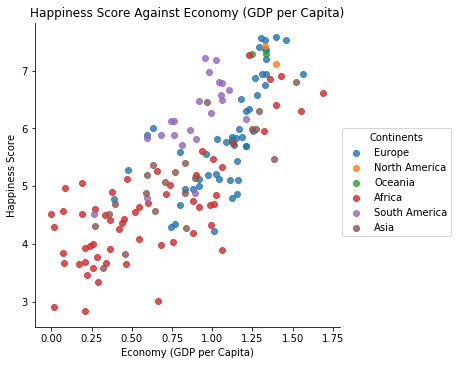

In [16]:
sns.lmplot(x = "Economy (GDP per Capita)", y = "Happiness Score", hue = "Continents", fit_reg = False, data = df)
plt.title("Happiness Score Against Economy (GDP per Capita)")
plt.show()

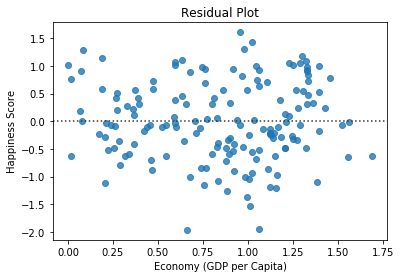

In [17]:
sns.residplot(x = "Economy (GDP per Capita)", y = "Happiness Score", data = df)
plt.title("Residual Plot")
plt.show()

As we can see, Happiness Score and Economy (GDP per Capita) are positively correlated and the relationship is somewhat linear. The residuals are fairly random distributed as well. In addition, Majority of African countries have low Happiness Score and Economy Size while Majority of European, Oceania and North American countries have high Happiness Score and Economy Size.

### How Happiness Scores differ acorss Regions?

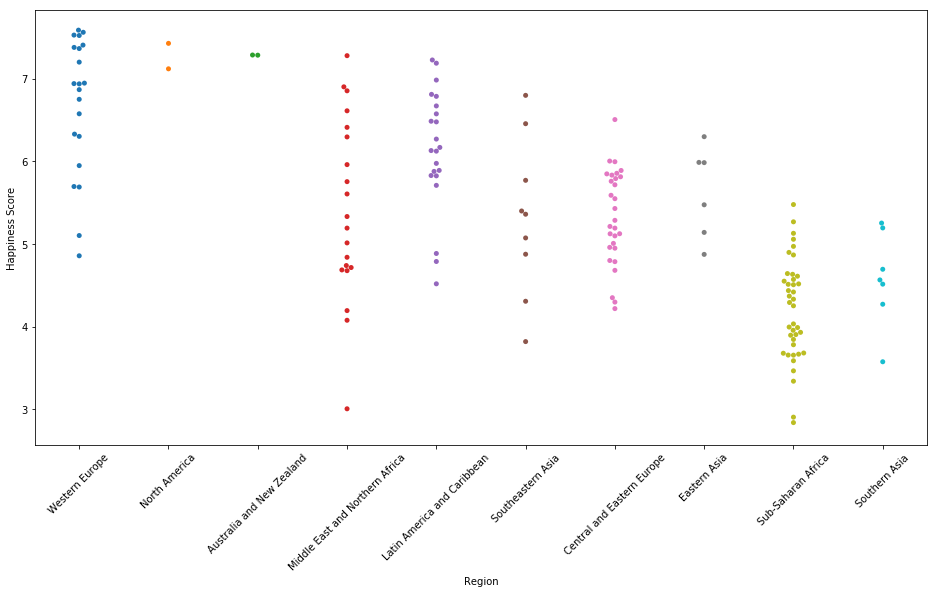

In [18]:
ax, fig = plt.subplots(figsize = (16, 8))
sns.swarmplot(x = "Region", y = "Happiness Score", data = df)
plt.xticks(rotation=45)
plt.show()

In [19]:
print(df.groupby("Region")["Happiness Score"].mean().sort_values(ascending = False))

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64


From the swarmplot and statistics, we see that Austrialia and New Zealand, North America and Western Europe have the highest Happiness Score while Sub-Saharan Africa has the lowest.

### Explore the relationships between Happiness Score, Life Expectancy and Economy by Continents

In [20]:
size = (df["Economy (GDP per Capita)"].values) * 3000 # Create an array for economy size
continents = df["Continents"].values
continents = pd.Categorical.from_array(continents).labels # Convert string actor to numeric values
colors = np.array(["r","b","g","m","y","gold","pink","maroon","steelblue","lightseagreen"])
c = colors[continents]

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  This is separate from the ipykernel package so we can avoid doing imports until


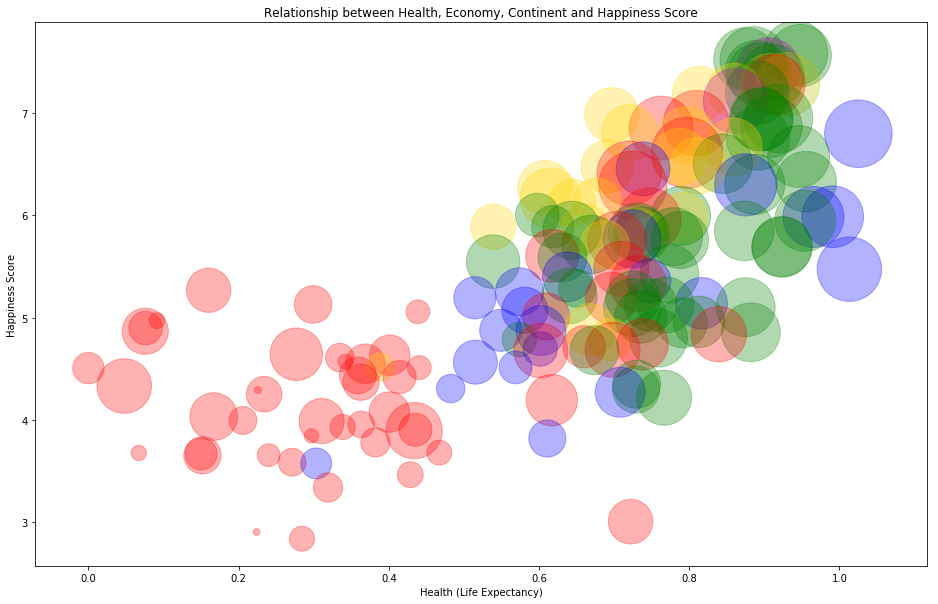

In [21]:
ax, fig = plt.subplots(figsize = (16, 10))
plt.scatter(x = "Health (Life Expectancy)", y = "Happiness Score", data = df, s = size, c = c,alpha = 0.3)
plt.title("Relationship between Health, Economy, Continent and Happiness Score")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()

The size of the bubble represents the economy size of individual country. The color represents the continent the individual country belongs to. From the bubble plot, we observed that bubbles' sizes are larger in the upper right corner and many red bubbles in the lower left corner. Since red represents Africa, it indicates that African countries have the lowest Life Expectancy, Economy and Happiness Score on average. In addition, larger economy and  life expectancy contribute to higher Happiness Score for many countries.

### Does freedom to make life choices in a country impacts Happiness Score?

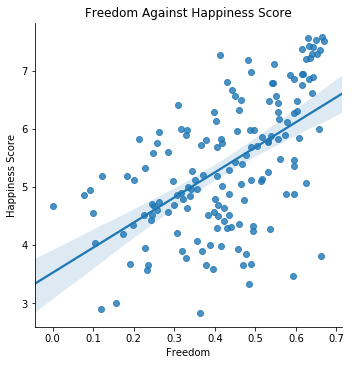

In [22]:
sns.lmplot(x = "Freedom", y = "Happiness Score", data =df)
plt.title("Freedom Against Happiness Score")
plt.show()

Scatterplot shows a positive correlation between the two but the relationship was not as strong as Economy and Happiness Score.

### Which continent has the highest freedom score?

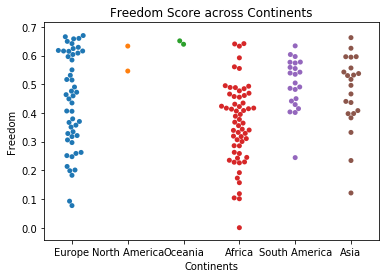

In [23]:
sns.swarmplot(y = "Freedom", x = "Continents",data = df)
plt.title("Freedom Score across Continents")
plt.show()

In [24]:
print(df.groupby("Continents")["Freedom"].mean().sort_values(ascending = False))

Continents
Oceania          0.645310
North America    0.589505
South America    0.501740
Asia             0.472829
Europe           0.438765
Africa           0.364546
Name: Freedom, dtype: float64


Africa has the lowest freedom score on average and Oceania has the highest across all continents in the world. People should consider live in Oceania or North America and stay away from Africa if they appreciates more freedom in their life.

### Which countries have the highest freedom in the world?

In [25]:
df.Freedom.sort_values(ascending = False).head()

Country
Norway         0.66973
Switzerland    0.66557
Cambodia       0.66246
Sweden         0.65980
Uzbekistan     0.65821
Name: Freedom, dtype: float64

Norway has the most freedom following by Switzerland, Cambodia, Sweden and Uzbekistan.

### Which countries have the least freedom in the world?

In [26]:
df.Freedom.sort_values().head()

Country
Iraq                      0.00000
Greece                    0.07699
Bosnia and Herzegovina    0.09245
Sudan                     0.10081
Angola                    0.10384
Name: Freedom, dtype: float64

People should stay away from Iraq, Greece, Bosnia and Herzegovina, Sudan and Angola if they value freedom in their life.

### Does social support differs across all continents on average?

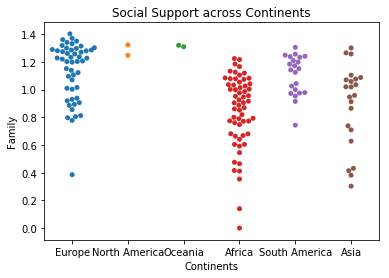

In [27]:
sns.swarmplot(x = "Continents", y = "Family", data = df)
plt.title("Social Support across Continents")
plt.show()

In [28]:
print(df.groupby("Continents")["Family"].mean().sort_values(ascending = False))

Continents
Oceania          1.314450
North America    1.284860
Europe           1.134631
South America    1.104720
Asia             0.889910
Africa           0.846220
Name: Family, dtype: float64


Again, Africa has the lowest social support on average and Oceania has the most across all continents in the world. People should consider live in Oceania or North America and stay away from Africa if they are looking for social support to make their life happier.

### What are the top and botton 5 countries in social support?

In [29]:
print(df.Family.sort_values().head())
print(df.Family.sort_values(ascending = False).head())

Country
Central African Republic    0.00000
Togo                        0.13995
Afghanistan                 0.30285
Benin                       0.35386
India                       0.38174
Name: Family, dtype: float64
Country
Iceland        1.40223
Ireland        1.36948
Denmark        1.36058
Switzerland    1.34951
Uzbekistan     1.34043
Name: Family, dtype: float64


Central African Republic has the least social support and Iceland has the most in the world.

### How government trust differs across all continents on average?

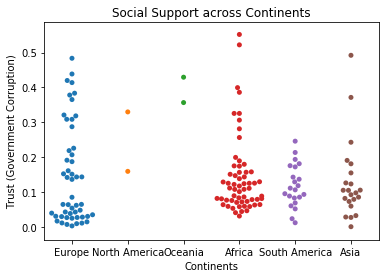

In [30]:
sns.swarmplot(x = "Continents", y = "Trust (Government Corruption)", data = df)
plt.title("Social Support across Continents")
plt.show()

In [31]:
print(df.groupby("Continents")["Trust (Government Corruption)"].mean().sort_values(ascending = False))

Continents
Oceania          0.392795
North America    0.244235
Europe           0.147485
Africa           0.143152
Asia             0.129336
South America    0.117172
Name: Trust (Government Corruption), dtype: float64


South American citizens have the least trust to their government following by Asia. Oceania once against is the highest in this category.

### What are the top and botton 5 countries in terms of government trust?

In [32]:
print(df["Trust (Government Corruption)"].sort_values().head())
print(df["Trust (Government Corruption)"].sort_values(ascending = False).head())

Country
Indonesia                 0.00000
Bosnia and Herzegovina    0.00227
Romania                   0.00649
Bulgaria                  0.00872
Lithuania                 0.01031
Name: Trust (Government Corruption), dtype: float64
Country
Rwanda       0.55191
Qatar        0.52208
Singapore    0.49210
Denmark      0.48357
Sweden       0.43844
Name: Trust (Government Corruption), dtype: float64


Indonesia citizens have the lowest trust to their government. Rwanda citizens have the highest trust to their government in the world.

# Modeling
## Multiple Linear regression Model

From substantial exploratory analysis, we found that Economy (GDP per Capita), Family, Health (Life Expectancy) and Freedom are potential variables to predict Happiness Score. Now, we build a multiple linear regression for future prediction.

## Split 2015 data to training and testing

In [33]:
# Create predictors matrix X and one-dimensional array response Y
X = df.iloc[:, 4:10]
Y = df["Happiness Score"]
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(158, 6)
(158,)


## Full model with all six predictors:
- Economy
- Health
- Family
- Freedom
- Trust
- Generosity

In [34]:
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 6)
(32, 6)
(126,)
(32,)


In [35]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train)) # R2 = 0.78
print(model.score(X_test, y_test )) # R2 = 0.76

0.7788420871167523
0.7571057958032001


Training R-squared is about 78% and testing R-squared is about 76%.

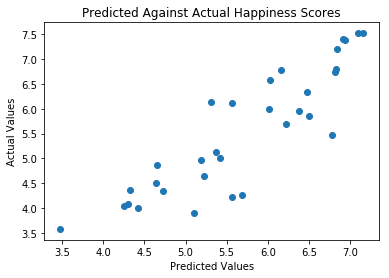

In [36]:
predicted_value = model.predict(X_test)
plt.scatter(predicted_value, y_test)
plt.title("Predicted Against Actual Happiness Scores")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

The scatterplot shows that predicted values and actua values are close to each other.

### Check Assumptions

In [37]:
residuals = predicted_value - y_test
print(np.mean(residuals)) # Close to zero

0.15620572885824052


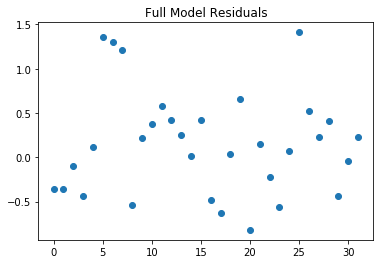

In [38]:
plt.plot(residuals, "o")
plt.title("Full Model Residuals")
plt.show()

The residuals are randomly distributed and the mean is close to zero. The training R-squared is 0.78 and testing R-Squared is 0.76. Therefore the model met the assumptions and have moderately high prediction accuracy.

## Subsetted model with only three predictors:
- Economy
- Family
- Freedom
- We remove trust and genorosity because they are the least significant predictors
- We also take health out to avoid multicollinearity because it is highly correlated with economy

In [39]:
X1 = X.iloc[:,[0,1,3]] # Subset to only the important predictors
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 3)
(32, 3)
(126,)
(32,)


In [40]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train)) # R2 = 0.76
print(model.score(X_test, y_test )) # R2 = 0.72

0.7602991362631111
0.7191553947601972


Training R-squared is about 76% and testing R-squared is about 72%.

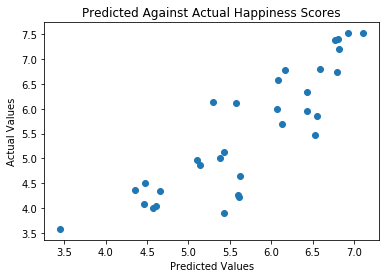

In [41]:
predicted_value = model.predict(X_test)
plt.scatter(predicted_value, y_test)
plt.title("Predicted Against Actual Happiness Scores")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

The scatterplot shows that predicted values and actua values are close to each other.
### Check Assumptions

In [42]:
residuals = predicted_value - y_test
print(np.mean(residuals)) # Close to zero

0.17459892585456804


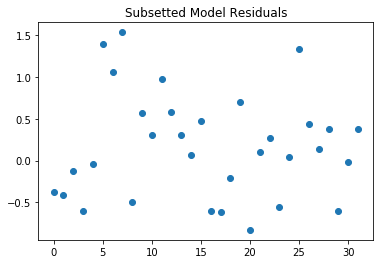

In [43]:
plt.plot(residuals, "o")
plt.title("Subsetted Model Residuals")
plt.show()

The residuals are randomly distributed and the mean is close to zero. The training R-squared is 0.76 and testing R-Squared is 0.72. Therefore the model met the assumptions and have moderately high prediction accuracy.

###  Even though the full model give us slightly lower training and testing MSE, we would recommand the subsetted model because it significantly reduce the cost of collecting additional data. We will further examine their prediction accuracies using 2015 data as training and 2016 as testing.

# Prediction

### Make Prediction to 2016 Happiness Data using Full Linear Model

### Full Model

In [44]:
df2016 = pd.read_csv("2016.csv")
df2016.set_index("Country", inplace = True)
df2016.head()

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [45]:
# Reformat the data for prediction
Xnew = df2016.iloc[:, 5:11]
actual = np.array(df2016["Happiness Score"])

In [46]:
# Build Model
fullmodel = linear_model.LinearRegression()
fullmodel.fit(X, Y)

# Predicted values
prediction = fullmodel.predict(Xnew)

In [47]:
#Predicted Value
print(fullmodel.score(X, Y)) # R2 = 0.777
print(fullmodel.score(Xnew, actual )) # R2 = 0.693

0.7772384894312989
0.6933205254506978


-0.34202410844999837


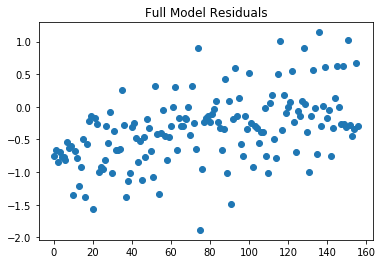

In [48]:
# Residual Plot
residuals = prediction - actual
print(np.mean(residuals)) # Close to zero
plt.plot(residuals, "o")
plt.title("Full Model Residuals")
plt.show()

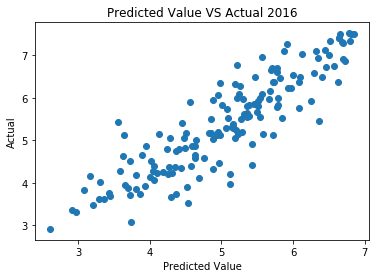

In [49]:
# Plot result
plt.scatter(x = prediction, y = actual)
plt.xlabel("Predicted Value")
plt.ylabel("Actual")
plt.title("Predicted Value VS Actual 2016")
plt.show()

### Full Model Testing Result
Training R-squared is about 0.777 and testing R-squared is about 0.693. The full model perform decently as we see a somewhat linear relationship between predicted values and actual values. The residuals are somewhat normally distributed and no significant outlier presented in the plot.

### Make Prediction to 2016 Happiness Data using Subsetted Model

In [50]:
Xnew1 = df2016.iloc[:, [5,6,8]]

# Build Model
model = linear_model.LinearRegression()
model.fit(X1, Y)

#Predicted Value
prediction = model.predict(Xnew1)

# R-squared
print(model.score(X1, Y)) # R2 = 0.755
print(model.score(Xnew1, actual)) # R2 = 0.714


0.754775412636749
0.7137697841546066


-0.23240338021358806


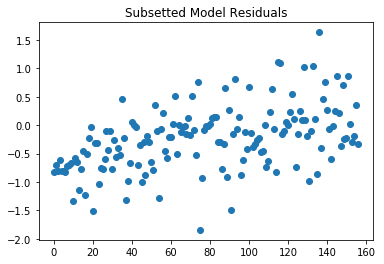

In [51]:
# Residual Plot
residuals = prediction - actual
print(np.mean(residuals)) # Close to zero
plt.plot(residuals, "o")
plt.title("Subsetted Model Residuals")
plt.show()

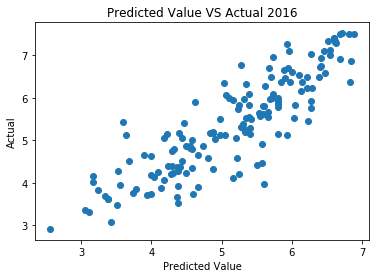

In [52]:
# Plot result
plt.scatter(x = prediction, y = actual)
plt.xlabel("Predicted Value")
plt.ylabel("Actual")
plt.title("Predicted Value VS Actual 2016")
plt.show()

### Subsetted Model Testing Result
The testing R-squared is slightly higher than the full model by about 2%. This result is significant because including Trust, Health and Generosity into our model didn't improve prediction accuracy. We suspect the fullmodel overfits the training data. We conclude that higher GDP per Capita, family and freedom score contributes to higher Happiness Score. Note that residuals are somewhat normally distributed hence the assumptions were met. We will be able to accurately predict future Happiness Score using just three variables instead of the full set. In fact, Gallup World Pull can saves thousands of dollars collecting additional data regarding Trust, Health and Generosity for each country yet still be able to estimate an accurate Happiness Score for each country. 

## Summary
### After exploring the happiness data, we get a better understanding about how Happiness Scores are calculated and what factors contribute the most. We also examined how different variables affect and interact with one another. We are now able to predict Happiness Score of a country in the future with economy, social support and freedom information using linear regression.

## Appendix
#### Table of predicted Happiness Score VS actual Happiness Score in 2016

In [53]:
table = pd.DataFrame(prediction)
table.index = df2016.index
table.columns = ["Predicted Happiness Score 2016"]
table["Actual Happiness Score 2016"] = actual
table

,Predicted Happiness Score 2016,Actual Happiness Score 2016
Country,,
Denmark,6.709221,7.526
Switzerland,6.813370,7.509
Iceland,6.689823,7.501
Norway,6.877347,7.498
Finland,6.605256,7.413
Canada,6.605419,7.404
Netherlands,6.508415,7.339
New Zealand,6.613967,7.334
Australia,6.612854,7.313
